In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
import scikitplot as skplt                     

In [65]:
pd.set_option('display.max_columns', 1000)

In [59]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')

In [60]:
feature_names = [x for x in train.columns if x not in ['connection_id','target']]
target = train['target']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size = 0.9, 
                                                    stratify = target, random_state = 2017)

In [62]:
## function for multi-accuracy
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

# default parameters
params = {'objective':'multi:softmax',
          'num_class':3,
          # 'eval_metric':'merror'
         }

In [63]:
dtrain = xgb.DMatrix(data=X_train[feature_names], label=y_train)
dvalid = xgb.DMatrix(data=X_test[feature_names], label=y_test)
dtest = xgb.DMatrix(data=test[feature_names])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [64]:
xgbst = xgb.train(params, dtrain, 1000, watchlist, maximize=True, verbose_eval=20, 
                early_stopping_rounds=40, feval=multAcc)

prediction = xgbst.predict(dtest)

[22:36:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[22:36:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[22:36:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-merror:0.222003	eval-merror:0.222255	train-maccuracy:0.777997	eval-maccuracy:0.777745
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 40 rounds.
[22:36:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[22:36:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[22:36:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[22:36:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra no

[22:36:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[22:36:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[22:36:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[22:36:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[22:36:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[22:36:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[22:36:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[22:36:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[22:36:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_

[22:36:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[22:36:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[22:36:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[22:36:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[22:36:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[22:36:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[22:36:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[22:36:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[22:36:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max

[22:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[22:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=6
[22:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[22:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[22:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[22:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[22:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, ma

In [34]:
## submission1
sub = pd.read_csv('sample_submission.csv')
sub['target'] = prediction
sub['target'] = sub['target'].astype(int)
sub.to_csv('my_submission_xgboost.csv', index=False)

In [35]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

mll_scorer = make_scorer(f1_score)
param_grid = {'min_samples_split':[2,5],
             'min_samples_leaf':[1,2,5]}

In [36]:
rfc = RandomForestClassifier(n_estimators=300,max_depth=15)
model = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=f1_score,verbose=10, n_jobs=-1, 
                     iid=True, refit=True, cv=2)

rfc.fit(X_train[feature_names],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
test_prediction = rfc.predict(X_test[feature_names])
train_prediction = rfc.predict(X_train[feature_names])

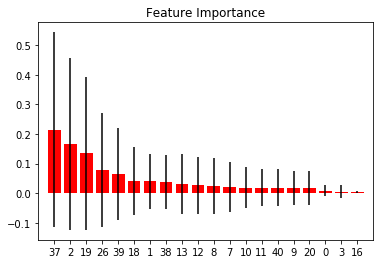

In [46]:
skplt.estimators.plot_feature_importances(rfc)
plt.show()

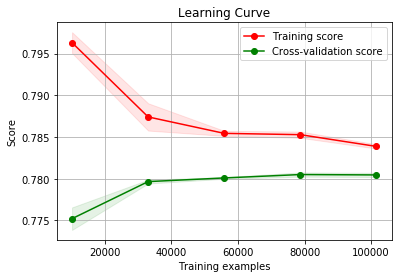

In [47]:
skplt.estimators.plot_learning_curve(rfc,X_train[feature_names],y_train)
plt.show()

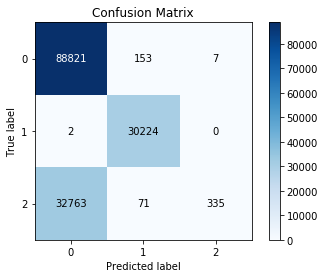

In [48]:
f1_score(y_train,train_prediction,average=None)
f1_score(y_test,test_prediction,average= None).mean()

skplt.metrics.plot_confusion_matrix(y_train,train_predict)
plt.show()

In [49]:
prediction = rfc.predict(test[feature_names])

In [50]:
## submission 2
sub = pd.read_csv('sample_submission.csv')
sub['target'] = prediction
sub['target'] = sub['target'].astype(int)
sub.to_csv('my_submission_rfc.csv', index=False)

In [52]:
## end